In [1]:
import sys
import time
import numpy as np
import pandas as pd
sys.path.append("..")
from tma.model import Model
from tma.objects import Target, Observer
from tma.algorithms import Algorithms, Swarm
from tma.helper_functions import df_to_docx
from pathlib import Path
from datetime import datetime

In [2]:
print("Время последнего моделирования:", datetime.now().strftime("%d/%m/%Y %H:%M\n"))

observer_x, observer_y, observer_course, observer_velocity = 0.0, 0.0, 0.0, 3.0
observer = Observer(observer_x, observer_y, observer_course, observer_velocity, verbose=True)

observer.forward_movement(2 * 60)
observer.change_course(270, 'left', omega=0.5)
observer.forward_movement(3 * 60)
observer.change_course(90, 'right', omega=0.5)
observer.forward_movement(2 * 60)

Время последнего моделирования: 18/05/2021 14:46

Наблюдатель имеет начальные параметры (0.0, 0.0, 0.0, 3.0)
Наблюдатель движется прямо по курсу 0.0° 120с
Наблюдатель перешёл на курс 270.0° (угловая скорость 0.5) за 180с
Наблюдатель движется прямо по курсу 270.0° 180с
Наблюдатель перешёл на курс 90.0° (угловая скорость 0.5) за 360с
Наблюдатель движется прямо по курсу 90.0° 120с


In [3]:
p0 = [0.0, 25.0, 90.0, 7.0]
time = range(300, 960, 40)
def target_func(seed=None):
    rng = np.random.RandomState(seed)
    b = 0
    d = rng.uniform(5, 50)
    c = rng.uniform(0, 180)
    v = rng.uniform(5, 15)
    return [b, d, c, v]
result_df = pd.DataFrame(columns=[
                                'Тк', 
                                'Рэф1', 'Рэф2', 'Рэф3', 'Рэф4', 'Рэф5', 
                                'Ка', 'Вычисления', 'Вычисления макс', 'Итерации', 
                                'Итерации макс', 'Время', 'Время макс',
                                ])
mean_columns = ['Ка', 'Вычисления', 'Итерации', 'Время']
max_columns = ['Вычисления', 'Итерации', 'Время']
new_max_columns = [i + ' макс' for i in max_columns]

In [4]:
%%time
for t in time:
    model = Model(observer, end_t=t, noise_std=np.radians(1))
    swarm = Swarm(model)
    swarm.set_algorithm('ММП')
    swarm.set_target_func(target_func)
    swarm.set_initial(p0)
    r = swarm.run(n=1000)
    df = swarm.get_df(r)
    # df.to_excel('../tests/test7/' 'Траектория 5, ' + str(d_range) + ', ' + str(std) + '.xlsx', index=False)
    res = pd.DataFrame({'Тк': [t]})
    for i in range(5):
        res['Рэф' + str(i + 1)] = [df['Успех'].apply(lambda x: x[i]).mean(axis=0)]
    res[mean_columns] = df[mean_columns].mean(axis=0)
    res[new_max_columns] = df[max_columns].apply(max, axis=0)
    result_df = result_df.append(res)

Wall time: 2min 40s


In [5]:
result_df

,Тк,Рэф1,Рэф2,Рэф3,Рэф4,Рэф5,Ка,Вычисления,Вычисления макс,Итерации,Итерации макс,Время,Время макс
0,300,0.001,0.005,0.006,0.010,0.021,0.974033,20.264,73.0,17.466,46.0,0.003915,0.020871
0,340,0.007,0.015,0.016,0.022,0.038,0.976241,19.434,49.0,16.725,40.0,0.003549,0.008156
0,380,0.010,0.034,0.035,0.051,0.067,0.978972,18.567,43.0,16.119,36.0,0.003424,0.007754
0,420,0.016,0.039,0.041,0.059,0.103,0.980980,17.449,66.0,15.196,54.0,0.003641,0.028473
0,460,0.036,0.065,0.070,0.097,0.136,0.981628,16.586,43.0,14.493,38.0,0.004689,0.155454
0,500,0.028,0.069,0.073,0.106,0.150,0.982226,16.022,39.0,14.009,33.0,0.004383,0.016997
0,540,0.035,0.079,0.086,0.128,0.189,0.983126,15.595,41.0,13.609,33.0,0.003705,0.117724
0,580,0.038,0.097,0.111,0.153,0.219,0.983826,15.264,39.0,13.295,26.0,0.003342,0.087911
0,620,0.046,0.111,0.126,0.181,0.236,0.985092,14.859,33.0,12.908,27.0,0.003277,0.023452
0,660,0.042,0.129,0.143,0.201,0.275,0.985537,14.471,33.0,12.537,26.0,0.003811,0.093195


<AxesSubplot:xlabel='Тк', ylabel='Рэф1'>

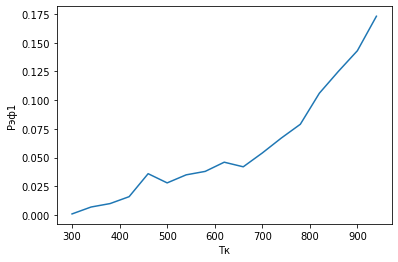

In [13]:
import seaborn as sns
sns.lineplot(data=result_df, x='Тк', y='Рэф1')